## import the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## loading csv file

In [2]:
data=pd.read_csv("pen_price.csv")

## inspect the dataframe

In [3]:
data.head()

,pen,price
0,5,25
1,3,15
2,20,95
3,10,48
4,9,45


In [4]:
data.tail()

,pen,price
5,12,58
6,17,80
7,14,67
8,8,40
9,6,30


## check the shape of dataframe

In [5]:
data.shape

(10, 2)

## checking for missing values

In [6]:
data.isnull().sum()

pen      0
price    0
dtype: int64

## checking for dupliated values

In [7]:
data.duplicated().sum()

0

## assumptions of linear regression
## 1.linearity

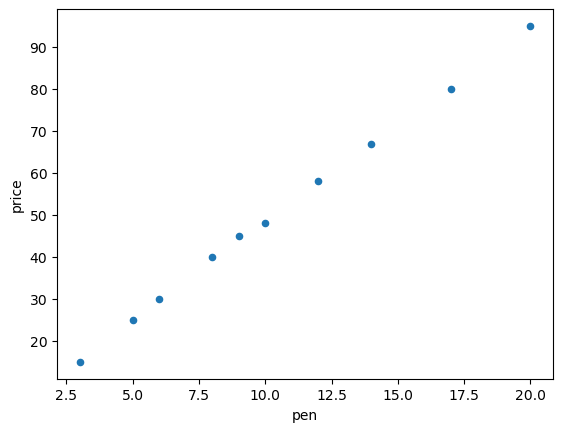

In [8]:
data.plot.scatter(x="pen",y="price")
plt.show()

a straight line an be seen from the graph,therefore it is linear

## 2.homoscedasitiy

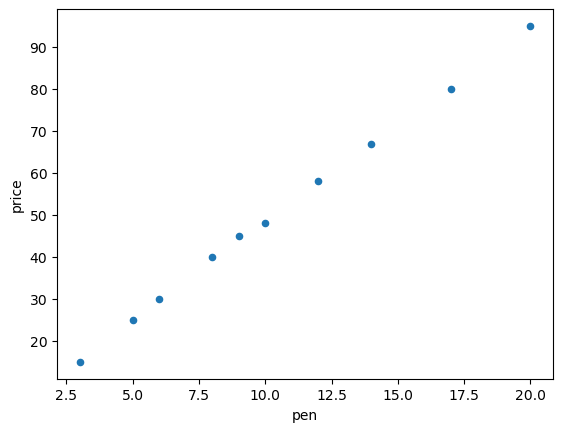

In [9]:
data.plot.scatter(x="pen",y="price")
plt.show()

no funnel shape is observed from the graph,so it is homosecdasity

## 3.normality
## histogram: this plot shows the distribution of data,but not acurate

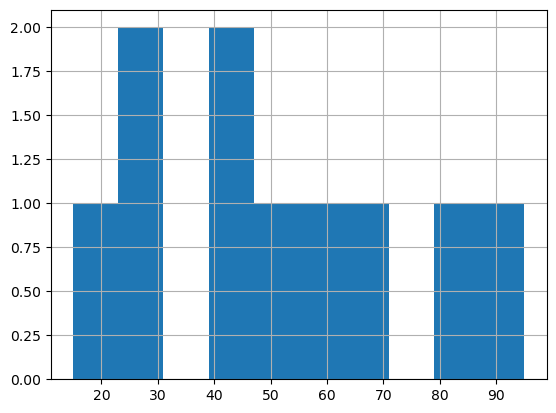

In [10]:
data["price"].hist()
plt.show()

we annot observed a bell shaped from the graph,so we cannot say it it normal distribution

## q-q plot
this plot displays our data against theoritical normal distribution

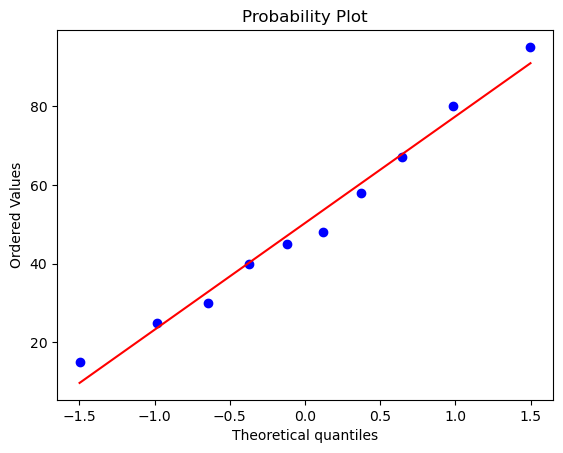

In [11]:
stats.probplot(data["price"],dist="norm",plot=plt)
plt.show()

most of the datapoints are not aligned with the diagonal line,so we cannot say it is normal distribution

## shapiro wilk test
return two values

w value:close to 1 is normal
p value:close to 0.05 is normal

In [12]:
w_value,p_value=stats.shapiro(data["price"])
print(w_value)
print(p_value)

0.974761962890625
0.9311483502388


both values are close to one so it is normal

## 4. independene is not applicable
## 5. multicollinearity is not applicable
## 6.outliner check

<Axes: >

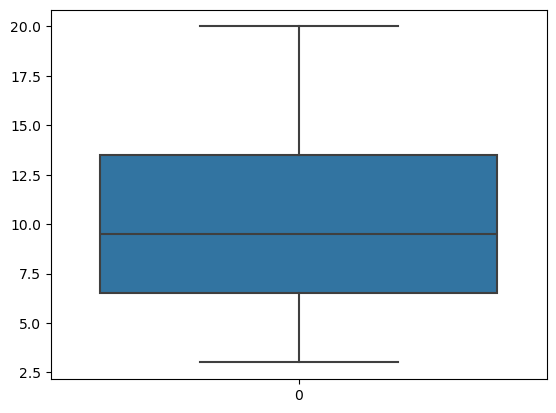

In [13]:
sn.boxplot(data.pen)

no outliner can be seen

## correlation with targets with features
## heatmap:displays the correlation based on color scale

In [14]:
corr=data.corr()



<Axes: >

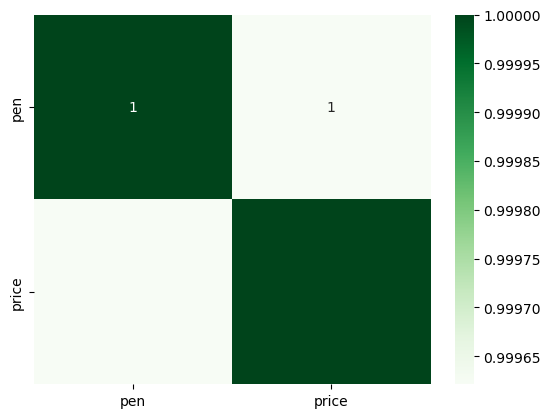

In [15]:
sn.heatmap(corr,cmap="Greens",annot=True)

## extrat features and targets

In [16]:
x=data.pen
y=data.price

In [17]:
x

0     5
1     3
2    20
3    10
4     9
5    12
6    17
7    14
8     8
9     6
Name: pen, dtype: int64

In [18]:
y

0    25
1    15
2    95
3    48
4    45
5    58
6    80
7    67
8    40
9    30
Name: price, dtype: int64

## spiltting the data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

## reshape

In [20]:
x_train=x_train.to_numpy().reshape(-1,1)
x_test=x_test.to_numpy().reshape(-1,1)


## model training

In [21]:
regression=LinearRegression()

In [22]:
regression.fit(x_train,y_train)

LinearRegression()

## model testing

In [23]:
y_pred=regression.predict(x_test)
print(regression.coef_[0])
print(regression.intercept_)

4.602073882047956
2.577446532728473


y= 4.6x+2.57

In [24]:
data_error=pd.DataFrame()
data_error['y_test']=y_test
data_error['y_pred']=y_pred
data_error.head()

,y_test,y_pred
7,67,67.006481
1,15,16.383668


## metrics evaluation

In [25]:
mean_absolute_error(y_test,y_pred)

0.6950745301361039

In [26]:
mean_squared_error(y_test,y_pred)

0.95728981552381

In [27]:
mse=mean_squared_error(y_test,y_pred)
np.sqrt(mse)

0.9784118843942003

In [28]:
r2_score(y_test,y_pred)

0.9985838908054382

## visualization regression line

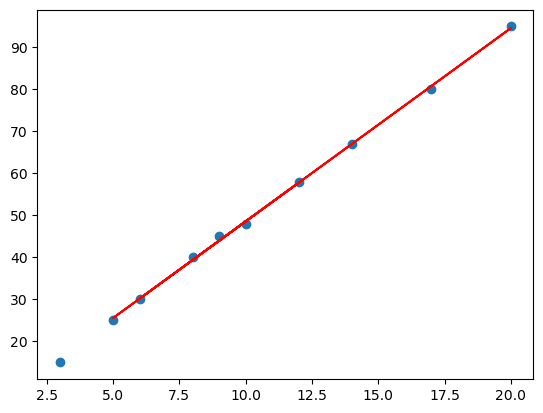

In [29]:
plt.plot(x_train,regression.predict(x_train),color="red")
plt.scatter(data["pen"],data["price"])

## the model performane is 
r2 score:0.9985838908054382 ie 99.8%